In this lab, we’ll be using a dataset from Kaggle — always a rich source for real-world problems! Specifically, we'll work with an **Income** dataset to predict whether an individual makes **over $50,000 per year** based on various features.

**[Dataset Link: Income Classification Dataset](https://www.kaggle.com/datasets/lodetomasi1995/income-classification?sort=published)**

---

## Lab Goals
- **Primary Objective:** Predict whether an individual earns more than $50,000 per year.
- **Secondary Objectives:** 
  - Explore model performance across different techniques.
  - Understand how different data types impact modeling, especially with neural networks.

## Assignment Specifications

- **Required Models:**
  - Implement a **Naive Bayes** model.
  - Implement a **Neural Network** model.

- **Additional Models:**
  - Explore at least **two additional models** (e.g. Decision Trees, Random Forest, etc.).
  - *Tip:* You can use multiple neural network variations if you like, but we encourage you to revisit some of the classical models we’ve discussed previously.

- **Data Preprocessing:**
  - The dataset includes variables of multiple types (numerical, categorical, etc.).
  - You **may need to one-hot encode** the categorical (character) variables, especially for models like Neural Networks.

- **Narration & Documentation:**
  - Write your notebook for a **non-expert audience**:
    - Explain your steps clearly.
    - Avoid technical jargon where possible.
    - Include all your code, but focus on **narrating** your choices, findings, and interpretations in plain language.

- **Submission Instructions:**
  - Submit your work as one of the following:
    - An **HTML** file
    - An **IPYNB (Jupyter Notebook)** file
    - A **Google Colab link**
  - **Important:** Before submitting, rerun your entire notebook from top to bottom to ensure it runs cleanly!
___

## Dataset Preview

In [42]:
# Basic imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Models
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [43]:
df = pd.read_csv('Data/income_evaluation.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Dataset Information

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [45]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [46]:
def remove_spaces_from_columns(df):
    df.columns = df.columns.str.replace(' ', '', regex=False)
    return df
df = remove_spaces_from_columns(df)

In [47]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

### Class Distribution of Our Target
Do we have a majority class? 

In [48]:
df["income"].value_counts()

income
<=50K    24720
>50K      7841
Name: count, dtype: int64

### Exploratory Plots

Below are visuals exploring variables we can typically associate with income levels. 

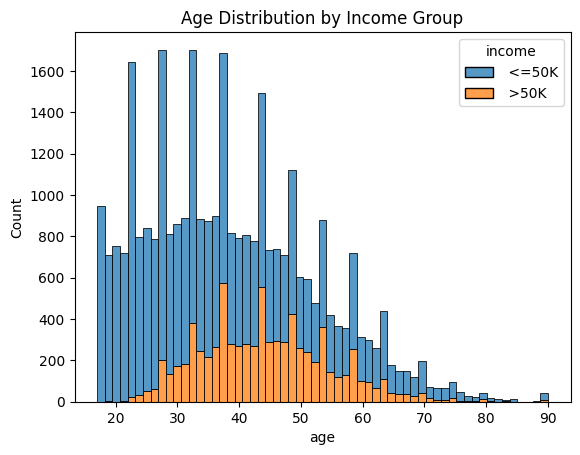

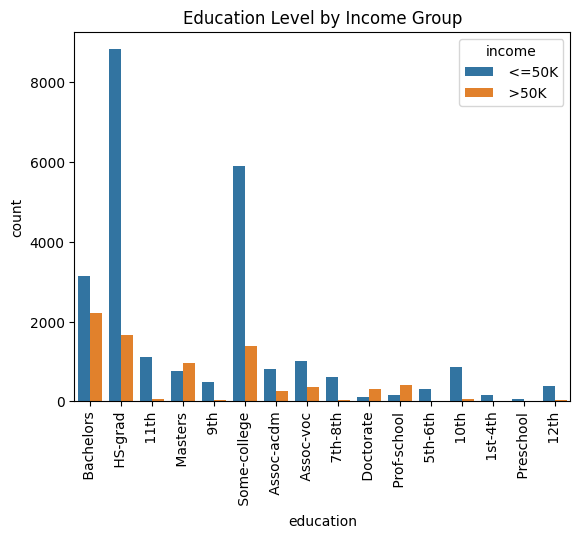

In [49]:
# Age distribution
sns.histplot(data=df, x="age", hue='income', multiple="stack")
plt.title('Age Distribution by Income Group')
plt.show()

# Categorical feature counts
sns.countplot(data=df, x="education", hue="income")
plt.xticks(rotation=90)
plt.title('Education Level by Income Group')
plt.show()

#### Age Distribution by Income Group

This plot shows the distribution of ages for individuals grouped by their income level (earning more or less than $50K per year).

- Most individuals earning less than \$50K tend to be younger, between their 20s and early 40s.
- Higher income (> \$50K) becomes more common among individuals aged roughly **30–55**.
- After about age 60, both groups decline significantly, likely due to retirement.
- Overall, income tends to increase with age up to a certain point, but the number of high earners still remains lower compared to those earning under $50K.

This suggests that **age is a useful predictor for income**, but not the only factor — many older individuals still earn under $50K.

#### Education Level by Income Group

This plot shows how different education levels are associated with income levels.

- Individuals with only a **high school diploma (HS-grad)** or **some college education** are far more likely to earn less than \$50K.
- Higher education levels such as **Bachelors**, **Masters**, and **Doctorates** are associated with a **greater proportion of higher income (> \$50K)**.
- However, even at the Bachelors level, many individuals still earn less than $50K, indicating that education alone doesn't guarantee a high salary.
- Very low education levels (e.g., 5th-6th grade, 10th grade) are strongly associated with lower income.

This suggests that **higher education increases the likelihood of earning more**, but it’s not the only factor — experience, job sector, and other variables may also play important roles, which is to be explored in modeling. 

